In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
data_astobot = pd.read_csv('/content/astrobot.csv')
data_finalfan = pd.read_csv('/content/data_FinalFantasy.csv')
data_Metaphor = pd.read_csv('/content/data_Metaphor.csv')
data_PrinceofPersia = pd.read_csv('/content/data_PrinceofPersia.csv')
data_Senua = pd.read_csv("/content/data_Senua'sSaga.csv")
data_blmwk = pd.read_csv("/content/data_blmwk.csv")

## Game Astro Bot

In [ ]:
data_astobot

,YQ4gaf src,FmcO7b,vWB2ve,T7nuU 2,WHxBId,gjvCCd
0,https://lh3.googleusercontent.com/a-/ALV-UjUWx...,Arun Katyal (Yodha),6 months ago,"Astro Bot is a huge phenomenon right now, cons...",You and 70 other people found this helpful.,70 people found this helpful.
1,https://lh3.googleusercontent.com/a-/ALV-UjW13...,Another Gaming Channel,6 months ago,Tl;dr: great game. Highly reccomend. This game...,You and 121 other people found this helpful.,121 people found this helpful.
2,https://lh3.googleusercontent.com/a-/ALV-UjUdM...,LBenn302,6 months ago,Wow. What a game.. I feel like this game is a ...,You and 40 other people found this helpful.,40 people found this helpful.
3,https://lh3.googleusercontent.com/a-/ALV-UjVwP...,Ember (Em),6 months ago,I couldn't be happier with Astro Bot. I've pla...,You and 13 other people found this helpful.,13 people found this helpful.
4,https://lh3.googleusercontent.com/a-/ALV-UjUtQ...,Blerd Static,6 months ago,WARNING! This game is highly addictive and fun...,You and 6 other people found this helpful.,6 people found this helpful.
...,...,...,...,...,...,...
370,https://lh3.googleusercontent.com/a-/ALV-UjXC7...,Yannick Krüger,2 months ago,Won game of the year\n\nbut the game is shit i...,You found this helpful.,Was this review helpful to you?
371,https://lh3.googleusercontent.com/a/ACg8ocISYV...,Anubhav Dash,3 months ago,"very nice, this game has won 2 ""THE GAME AWAR...",You found this helpful.,Was this review helpful to you?
372,https://lh3.googleusercontent.com/a-/ALV-UjV34...,Muhammad fahim,6 months ago,"My little bro grinds this game, after checking...",You found this helpful.,Was this review helpful to you?
373,https://lh3.googleusercontent.com/a/ACg8ocLPNn...,Rhonda Sims,6 months ago,One of the cutest most fun games I've ever played,You found this helpful.,Was this review helpful to you?


In [ ]:
data_astobot.columns = ["Avatar", "Reviewer", "Time", "Review", "Helpful", "Helpful_Count"]

In [ ]:
data_astobot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Avatar         375 non-null    object
 1   Reviewer       375 non-null    object
 2   Time           375 non-null    object
 3   Review         375 non-null    object
 4   Helpful        375 non-null    object
 5   Helpful_Count  375 non-null    object
dtypes: object(6)
memory usage: 17.7+ KB


In [ ]:
data_astobot.describe()

,Avatar,Reviewer,Time,Review,Helpful,Helpful_Count
count,375,375,375,375,375,375
unique,351,351,10,374,24,24
top,https://lh3.googleusercontent.com/a/default-us...,A Google User,6 months ago,Why is everyone acting like a Mario/Crash Band...,You found this helpful.,Was this review helpful to you?
freq,25,25,200,2,269,269


In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stopwords = set(stopwords.words('english'))

In [ ]:
import re

def preprocess_text(text):
    text = text.lower()  #
    text = re.sub(r'[^\w\s]', '', text)  # Loại bỏ dấu câu
    words = text.split()  # Tách từ
    words = [word for word in words if word not in stopwords]
    return " ".join(words)

In [ ]:
data_astobot["Cleaned_Review_Astrobot"] = data_astobot["Review"].astype(str).apply(preprocess_text)
data_astobot["Cleaned_Review_Astrobot"]

,Cleaned_Review_Astrobot
0,astro bot huge phenomenon right consistently g...
1,tldr great game highly reccomend game makes fe...
2,wow game feel like game mixture young old inno...
3,couldnt happier astro bot ive played astros pl...
4,warning game highly addictive funi thought wou...
...,...
370,game year game shit played little kids even ga...
371,nice game 2 game awards different genres
372,little bro grinds game checking see casual bit...
373,one cutest fun games ive ever played


In [ ]:
all_text = " ".join(data_astobot["Cleaned_Review_Astrobot"] )
word_counts = Counter(all_text.split())

In [ ]:
from wordcloud import WordCloud
from textblob import TextBlob

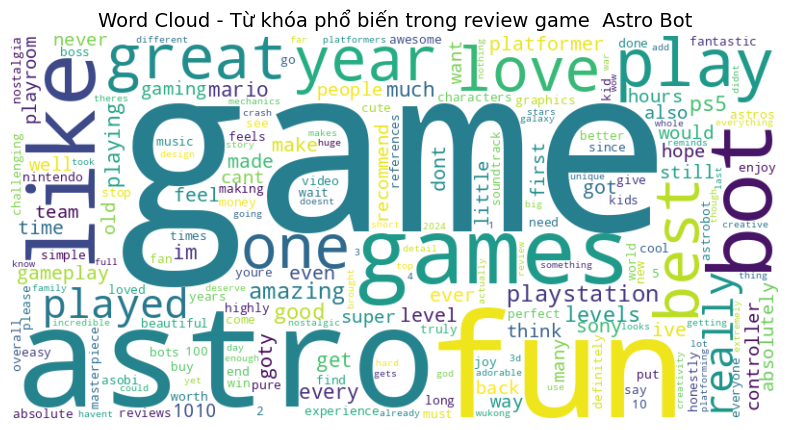

Top 10 từ phổ biến nhất: [('game', 637), ('fun', 142), ('astro', 138), ('games', 133), ('like', 130), ('bot', 120), ('play', 92), ('best', 77), ('year', 76), ('one', 75)]


In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Từ khóa phổ biến trong review game  Astro Bot", fontsize=14)
plt.show()

# Hiển thị top 10 từ phổ biến nhất
print("Top 10 từ phổ biến nhất:", word_counts.most_common(10))

In [ ]:
def get_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    else:
        return "Neutral"

In [ ]:
data_astobot["Sentiment"] = data_astobot["Review"].astype(str).apply(get_sentiment)

In [ ]:
sentiment_counts = data_astobot["Sentiment"].value_counts()

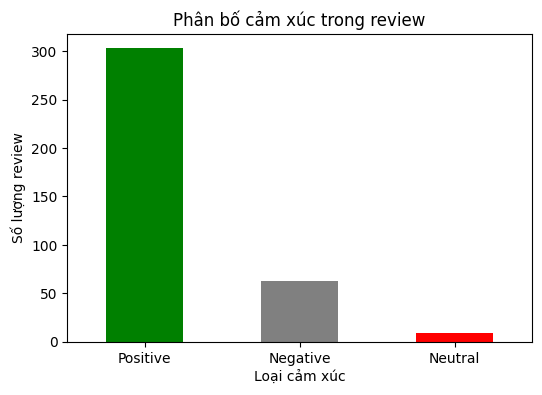

Tỷ lệ cảm xúc trong review:
Sentiment
Positive    0.808
Negative    0.168
Neutral     0.024
Name: count, dtype: float64


In [ ]:
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind="bar", color=["green", "gray", "red"])
plt.title("Phân bố cảm xúc trong review")
plt.xlabel("Loại cảm xúc")
plt.ylabel("Số lượng review")
plt.xticks(rotation=0)
plt.show()

# Hiển thị tỷ lệ phần trăm cảm xúc
print("Tỷ lệ cảm xúc trong review:")
print(sentiment_counts / sentiment_counts.sum())

## Game Final Fantasy VII Rebirth

In [ ]:
data_finalfan

,FmcO7b,vWB2ve,T7nuU 2,gjvCCd
0,Fahiem Ahmadi,a year ago,SPOILER WARNING. \n\nAbsolutely incredible. I ...,118 people found this helpful.
1,Dustin Christie,a year ago,"""Final Fantasy VII Rebirth"" is a testament to ...",151 people found this helpful.
2,Mike Steele,4 months ago,I would love to start by saying this entry hol...,3 people found this helpful.
3,jesse zimmermann,11 months ago,"As an FF7 fan since the original came out, thi...",30 people found this helpful.
4,Kristopher Dalton,a year ago,People may have raised eyebrows when I announc...,40 people found this helpful.
...,...,...,...,...
545,melsii krutii,11 months ago,The best actually got better. 10/10,Was this review helpful to you?
546,Erin Schueler,10 months ago,"I like this game, and I prefer this a lot more...",Was this review helpful to you?
547,Ash Smith,a year ago,The fps run 30 is bad and ending is mess they ...,6 people found this helpful.
548,Ashley AM,7 months ago,"I finished it yesterday, i liked it more than ...",Was this review helpful to you?


In [ ]:
data_finalfan.columns = ["name", "Time", "Review", "Helpful"]

In [ ]:
data_finalfan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     550 non-null    object
 1   Time     550 non-null    object
 2   Review   550 non-null    object
 3   Helpful  550 non-null    object
dtypes: object(4)
memory usage: 17.3+ KB


In [ ]:
data_finalfan.describe()

,name,Time,Review,Helpful
count,550,550,550,550
unique,550,20,549,37
top,Shinji Ikari,a year ago,Great game I want more of this kind a effort i...,Was this review helpful to you?
freq,1,228,2,355


In [ ]:
data_finalfan["Cleaned_Review_Final Fantasy VII Rebirth"] = data_finalfan["Review"].astype(str).apply(preprocess_text)
data_finalfan["Cleaned_Review_Final Fantasy VII Rebirth"]

,Cleaned_Review_Final Fantasy VII Rebirth
0,spoiler warning absolutely incredible glad pla...
1,final fantasy vii rebirth testament enduring l...
2,would love start saying entry holds best momen...
3,ff7 fan since original came game nails persona...
4,people may raised eyebrows announced plan take...
...,...
545,best actually got better 1010
546,like game prefer lot ff games like ffxvi
547,fps run 30 bad ending mess remake scene turn t...
548,finished yesterday liked first part absolutely...


In [ ]:
all_text = " ".join(data_finalfan["Cleaned_Review_Final Fantasy VII Rebirth"] )
word_counts = Counter(all_text.split())

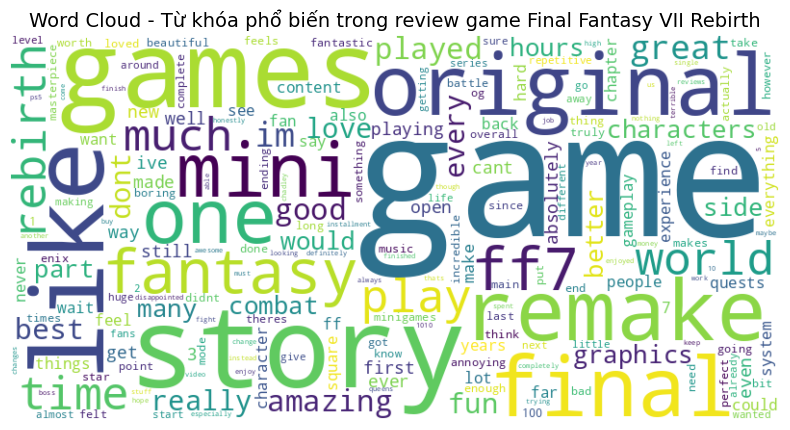

Top 10 từ phổ biến nhất: [('game', 1017), ('story', 302), ('games', 274), ('like', 234), ('original', 210), ('remake', 207), ('final', 196), ('one', 162), ('mini', 160), ('fantasy', 146)]


In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Từ khóa phổ biến trong review game Final Fantasy VII Rebirth", fontsize=14)
plt.show()

# Hiển thị top 10 từ phổ biến nhất
print("Top 10 từ phổ biến nhất:", word_counts.most_common(10))

In [ ]:
data_finalfan["Sentiment"] = data_finalfan["Review"].astype(str).apply(get_sentiment)

In [ ]:
sentiment_counts = data_finalfan["Sentiment"].value_counts()

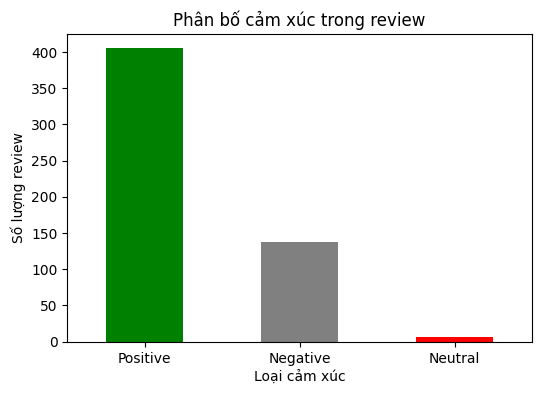

Tỷ lệ cảm xúc trong review:
Sentiment
Positive    0.736364
Negative    0.250909
Neutral     0.012727
Name: count, dtype: float64


In [ ]:
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind="bar", color=["green", "gray", "red"])
plt.title("Phân bố cảm xúc trong review")
plt.xlabel("Loại cảm xúc")
plt.ylabel("Số lượng review")
plt.xticks(rotation=0)
plt.show()

# Hiển thị tỷ lệ phần trăm cảm xúc
print("Tỷ lệ cảm xúc trong review:")
print(sentiment_counts / sentiment_counts.sum())

In [ ]:
data_Metaphor

,Reviewer,Time,Review,Helpful,Cleaned_Review_Metaphor: ReFantazio,Sentiment
0,Fork,5 months ago,Easily one of the best games Atlus has ever pu...,50 people found this helpful.,easily one best games atlus ever put definitel...,Positive
1,BeLikeBisharp,3 months ago,I'm quite fond of JRPGs as a whole but mostly ...,14 people found this helpful.,im quite fond jrpgs whole mostly persona games...,Positive
2,نو نيم,5 months ago,"In a generation full of remakes, remasters an...",70 people found this helpful.,generation full remakes remasters sequels 20 y...,Positive
3,Gilles Sooben,5 months ago,Is this a special or outstanding game like cri...,62 people found this helpful.,special outstanding game like critics fandom r...,Negative
4,Blaze 81G,2 months ago,Metaphor: ReFantazio delivers a truly immersiv...,2 people found this helpful.,metaphor refantazio delivers truly immersive e...,Positive
...,...,...,...,...,...,...
95,Tevin Whittaker,5 months ago,Hands down game of the year in my opinion. Onl...,Was this review helpful to you?,hands game year opinion downfall romance,Negative
96,SINA FARD,4 months ago,"A unique game in every way, truly the game tha...",Was this review helpful to you?,unique game every way truly game changed life,Negative
97,Alina I,4 months ago,"Amazing game, one of those that you know you'l...",Was this review helpful to you?,amazing game one know youll miss youve finished,Positive
98,Sean Halk,4 months ago,Knew this games characters would look like shi...,3 people found this helpful.,knew games characters would look like shit loo...,Negative


In [ ]:
data_Metaphor.columns = ["Avatar", "Reviewer", "Time", "Review", "Helpful", "Helpful_Count"]

ValueError: Length mismatch: Expected axis has 6 elements, new values have 4 elements

In [ ]:
data_PrinceofPersia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Reviewer  175 non-null    object
 1   Time      175 non-null    object
 2   Review    175 non-null    object
 3   Helpful   175 non-null    object
dtypes: object(4)
memory usage: 5.6+ KB


In [ ]:
data_PrinceofPersia.describe()

,Reviewer,Time,Review,Helpful
count,175,175,175,175
unique,172,17,175,17
top,Beau Sierens,a year ago,I honestly came into this title without high e...,Was this review helpful to you?
freq,2,114,1,98


In [ ]:
data_PrinceofPersia["Cleaned_Review_Metaphor: ReFantazio"] = data_Metaphor["Review"].astype(str).apply(preprocess_text)
data_PrinceofPersia["Cleaned_Review_Metaphor: ReFantazio"]

,Cleaned_Review_Metaphor: ReFantazio
0,easily one best games atlus ever put definitel...
1,im quite fond jrpgs whole mostly persona games...
2,generation full remakes remasters sequels 20 y...
3,special outstanding game like critics fandom r...
4,metaphor refantazio delivers truly immersive e...
...,...
95,hands game year opinion downfall romance
96,unique game every way truly game changed life
97,amazing game one know youll miss youve finished
98,knew games characters would look like shit loo...


In [ ]:
all_text = " ".join(data_Metaphor["Cleaned_Review_Metaphor: ReFantazio"])
word_counts = Counter(all_text.split())

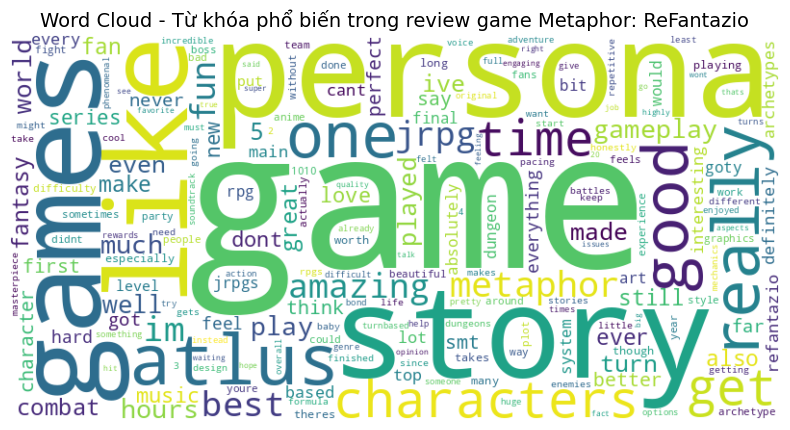

Top 10 từ phổ biến nhất: [('game', 174), ('persona', 65), ('story', 59), ('games', 51), ('like', 45), ('atlus', 34), ('really', 28), ('good', 27), ('one', 26), ('characters', 26)]


In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Từ khóa phổ biến trong review game Metaphor: ReFantazio", fontsize=14)
plt.show()

# Hiển thị top 10 từ phổ biến nhất
print("Top 10 từ phổ biến nhất:", word_counts.most_common(10))

In [ ]:
data_Metaphor["Sentiment"] = data_Metaphor["Review"].astype(str).apply(get_sentiment)

In [ ]:
sentiment_counts = data_Metaphor["Sentiment"].value_counts()

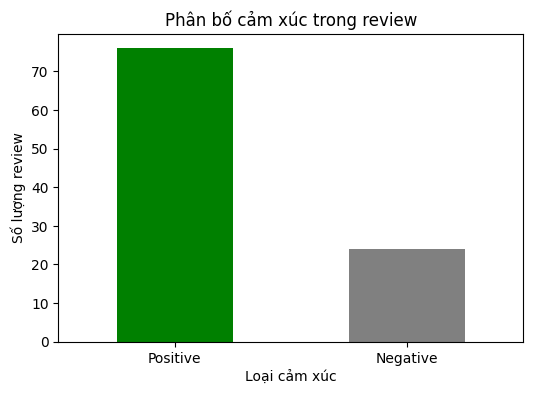

Tỷ lệ cảm xúc trong review:
Sentiment
Positive    0.76
Negative    0.24
Name: count, dtype: float64


In [ ]:
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind="bar", color=["green", "gray", "red"])
plt.title("Phân bố cảm xúc trong review")
plt.xlabel("Loại cảm xúc")
plt.ylabel("Số lượng review")
plt.xticks(rotation=0)
plt.show()

# Hiển thị tỷ lệ phần trăm cảm xúc
print("Tỷ lệ cảm xúc trong review:")
print(sentiment_counts / sentiment_counts.sum())

## Game Metaphor: ReFantazio

In [ ]:
data_Metaphor

,FmcO7b,vWB2ve,T7nuU 2,gjvCCd
0,Fork,5 months ago,Easily one of the best games Atlus has ever pu...,50 people found this helpful.
1,BeLikeBisharp,3 months ago,I'm quite fond of JRPGs as a whole but mostly ...,14 people found this helpful.
2,نو نيم,5 months ago,"In a generation full of remakes, remasters an...",70 people found this helpful.
3,Gilles Sooben,5 months ago,Is this a special or outstanding game like cri...,62 people found this helpful.
4,Blaze 81G,2 months ago,Metaphor: ReFantazio delivers a truly immersiv...,2 people found this helpful.
...,...,...,...,...
95,Tevin Whittaker,5 months ago,Hands down game of the year in my opinion. Onl...,Was this review helpful to you?
96,SINA FARD,4 months ago,"A unique game in every way, truly the game tha...",Was this review helpful to you?
97,Alina I,4 months ago,"Amazing game, one of those that you know you'l...",Was this review helpful to you?
98,Sean Halk,4 months ago,Knew this games characters would look like shi...,3 people found this helpful.


In [ ]:
data_Metaphor.columns = ["Reviewer", "Time", "Review", "Helpful"]

In [ ]:
data_Metaphor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Reviewer  100 non-null    object
 1   Time      100 non-null    object
 2   Review    100 non-null    object
 3   Helpful   100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [ ]:
data_Metaphor.describe()

,Reviewer,Time,Review,Helpful
count,100,100,100,100
unique,100,9,100,16
top,Fork,5 months ago,Easily one of the best games Atlus has ever pu...,Was this review helpful to you?
freq,1,39,1,40


In [ ]:
data_Metaphor["Cleaned_Review_Metaphor: ReFantazio"] = data_Metaphor["Review"].astype(str).apply(preprocess_text)
data_Metaphor["Cleaned_Review_Metaphor: ReFantazio"]

,Cleaned_Review_Metaphor: ReFantazio
0,easily one best games atlus ever put definitel...
1,im quite fond jrpgs whole mostly persona games...
2,generation full remakes remasters sequels 20 y...
3,special outstanding game like critics fandom r...
4,metaphor refantazio delivers truly immersive e...
...,...
95,hands game year opinion downfall romance
96,unique game every way truly game changed life
97,amazing game one know youll miss youve finished
98,knew games characters would look like shit loo...


In [ ]:
all_text = " ".join(data_Metaphor["Cleaned_Review_Metaphor: ReFantazio"])
word_counts = Counter(all_text.split())

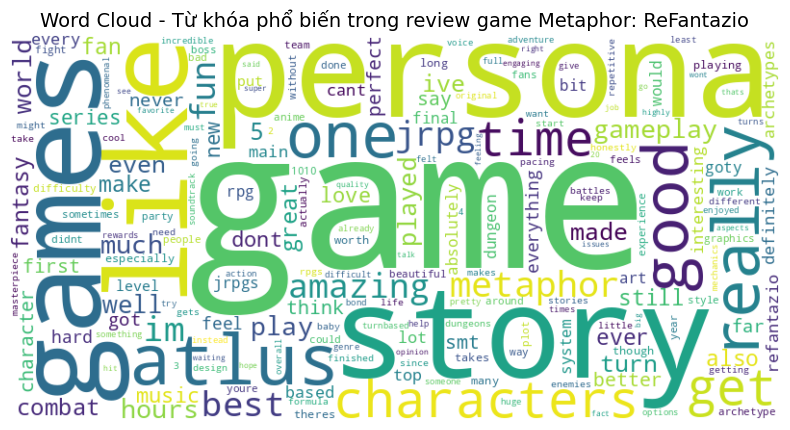

Top 10 từ phổ biến nhất: [('game', 174), ('persona', 65), ('story', 59), ('games', 51), ('like', 45), ('atlus', 34), ('really', 28), ('good', 27), ('one', 26), ('characters', 26)]


In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Từ khóa phổ biến trong review game Metaphor: ReFantazio", fontsize=14)
plt.show()

# Hiển thị top 10 từ phổ biến nhất
print("Top 10 từ phổ biến nhất:", word_counts.most_common(10))

In [ ]:
data_Metaphor["Sentiment"] = data_Metaphor["Review"].astype(str).apply(get_sentiment)

In [ ]:
sentiment_counts = data_Metaphor["Sentiment"].value_counts()

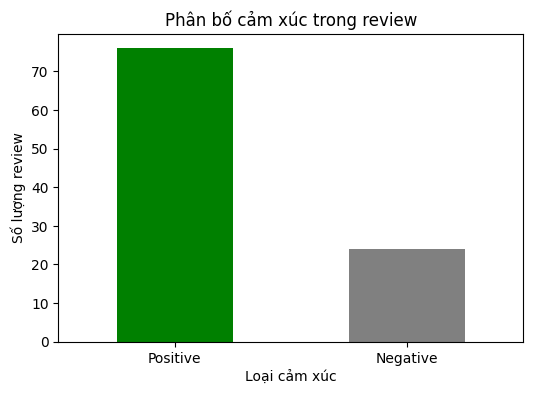

Tỷ lệ cảm xúc trong review:
Sentiment
Positive    0.76
Negative    0.24
Name: count, dtype: float64


In [ ]:
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind="bar", color=["green", "gray", "red"])
plt.title("Phân bố cảm xúc trong review")
plt.xlabel("Loại cảm xúc")
plt.ylabel("Số lượng review")
plt.xticks(rotation=0)
plt.show()

# Hiển thị tỷ lệ phần trăm cảm xúc
print("Tỷ lệ cảm xúc trong review:")
print(sentiment_counts / sentiment_counts.sum())

## Game Prince of Persia: The Lost Crown

In [ ]:
data_PrinceofPersia

,Reviewer,Time,Review,Helpful
0,Ruben Galindo,a year ago,I honestly came into this title without high e...,129 people found this helpful.
1,Erfan Abolghasemi,a year ago,As a Persian who knows the mythology of my hom...,187 people found this helpful.
2,Grace Knight,7 months ago,"Fun, but has major issues that ruin it.\n\nThe...",22 people found this helpful.
3,Zayd Zeitawi,2 months ago,The Lost Crown is an incredible experience tha...,Was this review helpful to you?
4,Michał Backwater,a year ago,"It's a good AA game. Nothing really great, out...",15 people found this helpful.
...,...,...,...,...
170,His dudeness,11 months ago,"It's great, but don't play it on anything more...",Was this review helpful to you?
171,RedDot Gamerz,a year ago,After A Long Playing Prince Of Persia Game And...,1 person found this helpful.
172,Garrett Sneed,a year ago,If you’re a Prince of Persia fan I cannot reco...,Was this review helpful to you?
173,Qasim Ali,4 months ago,An amazing platform game. But don't call it Pr...,Was this review helpful to you?


In [ ]:
data_PrinceofPersia.columns = ["Reviewer", "Time", "Review", "Helpful"]

In [ ]:
data_PrinceofPersia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Reviewer  175 non-null    object
 1   Time      175 non-null    object
 2   Review    175 non-null    object
 3   Helpful   175 non-null    object
dtypes: object(4)
memory usage: 5.6+ KB


In [ ]:
data_PrinceofPersia.describe()

,Reviewer,Time,Review,Helpful
count,175,175,175,175
unique,172,17,175,17
top,Beau Sierens,a year ago,I honestly came into this title without high e...,Was this review helpful to you?
freq,2,114,1,98


In [ ]:
data_PrinceofPersia["Cleaned_Review_Prince of Persia: The Lost Crown"] = data_PrinceofPersia["Review"].astype(str).apply(preprocess_text)
data_PrinceofPersia["Cleaned_Review_Prince of Persia: The Lost Crown"]

,Cleaned_Review_Prince of Persia: The Lost Crown
0,honestly came title without high expectations ...
1,persian knows mythology homeland prince persia...
2,fun major issues ruin game good story nice bos...
3,lost crown incredible experience truly stands ...
4,good aa game nothing really great outstanding ...
...,...
170,great dont play anything warrior difficulty im...
171,long playing prince persia game experience gam...
172,youre prince persia fan cannot recommend game ...
173,amazing platform game dont call prince persia


In [ ]:
all_text = " ".join(data_PrinceofPersia["Cleaned_Review_Prince of Persia: The Lost Crown"])
word_counts = Counter(all_text.split())

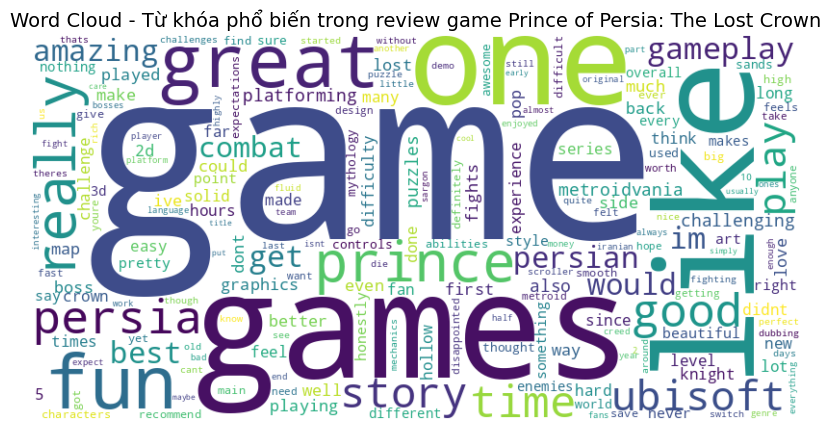

Top 10 từ phổ biến nhất: [('game', 358), ('games', 78), ('like', 67), ('one', 66), ('great', 60), ('fun', 59), ('prince', 55), ('really', 55), ('persia', 55), ('good', 53)]


In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Từ khóa phổ biến trong review game Prince of Persia: The Lost Crown", fontsize=14)
plt.show()

# Hiển thị top 10 từ phổ biến nhất
print("Top 10 từ phổ biến nhất:", word_counts.most_common(10))

In [ ]:
data_PrinceofPersia["Sentiment"] = data_PrinceofPersia["Review"].astype(str).apply(get_sentiment)

In [ ]:
sentiment_counts = data_PrinceofPersia["Sentiment"].value_counts()

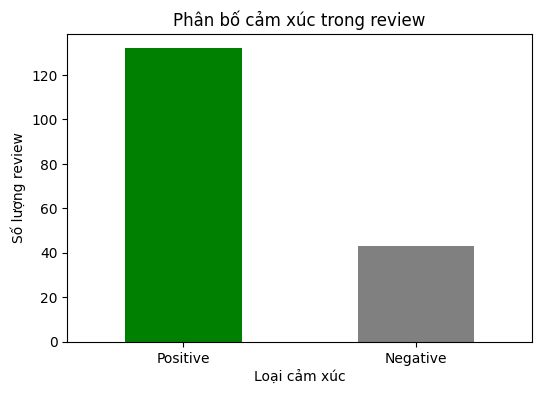

Tỷ lệ cảm xúc trong review:
Sentiment
Positive    0.754286
Negative    0.245714
Name: count, dtype: float64


In [ ]:
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind="bar", color=["green", "gray", "red"])
plt.title("Phân bố cảm xúc trong review")
plt.xlabel("Loại cảm xúc")
plt.ylabel("Số lượng review")
plt.xticks(rotation=0)
plt.show()

# Hiển thị tỷ lệ phần trăm cảm xúc
print("Tỷ lệ cảm xúc trong review:")
print(sentiment_counts / sentiment_counts.sum())

## Game Senua's Saga: Hellblade II)

In [ ]:
data_Senua

,FmcO7b,vWB2ve,T7nuU 2,gjvCCd
0,anwar mirza,8 months ago,"Interestingly, I find Senua II even better tha...",19 people found this helpful.
1,Zohair Ahmed,8 months ago,**Hellblade: Senua's Saga - A Brief Review**\n...,10 people found this helpful.
2,Kibra Devine,10 months ago,The audio and visuals work together so well to...,45 people found this helpful.
3,Jayesh Sinha,10 months ago,Absolute cinematic experience and a visual sho...,19 people found this helpful.
4,Sohan Dhanushka Gunarathne,10 months ago,"Senua’s Saga: Hellblade II is a deep, immersiv...",20 people found this helpful.
...,...,...,...,...
270,Hannah Pinder,a week ago,"Loved everything about it, from the gameplay t...",Was this review helpful to you?
271,Timothy Mukansi,10 months ago,This is a walking simulator. Graphics are grea...,2 people found this helpful.
272,Loitersquad E,10 months ago,Everyone is gonna have their personal opinion!...,1 person found this helpful.
273,David Mackie,10 months ago,Really enjoyed the first one and this is bette...,1 person found this helpful.


In [ ]:
data_Senua.columns = ["Reviewer", "Time", "Review", "Helpful"]

In [ ]:
data_Senua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Reviewer  275 non-null    object
 1   Time      275 non-null    object
 2   Review    275 non-null    object
 3   Helpful   275 non-null    object
dtypes: object(4)
memory usage: 8.7+ KB


In [ ]:
data_Senua.describe()

,Reviewer,Time,Review,Helpful
count,275,275,275,275
unique,275,12,275,21
top,sonic knuckles knuckles,10 months ago,Best Game Best Sound Great Story Excellent Rea...,Was this review helpful to you?
freq,1,142,1,166


In [ ]:
data_Senua["Cleaned_Review_Senua's Saga: Hellblade II"] = data_Senua["Review"].astype(str).apply(preprocess_text)
data_Senua["Cleaned_Review_Senua's Saga: Hellblade II"]

,Cleaned_Review_Senua's Saga: Hellblade II
0,interestingly find senua ii even better predec...
1,hellblade senuas saga brief review hellblade s...
2,audio visuals work together well create master...
3,absolute cinematic experience visual showcase ...
4,senuas saga hellblade ii deep immersive emotio...
...,...
270,loved everything gameplay storyline would defi...
271,walking simulator graphics great gameplay basi...
272,everyone gonna personal opinion personal opini...
273,really enjoyed first one better every way


In [ ]:
all_text = " ".join(data_Senua["Cleaned_Review_Senua's Saga: Hellblade II"])
word_counts = Counter(all_text.split())

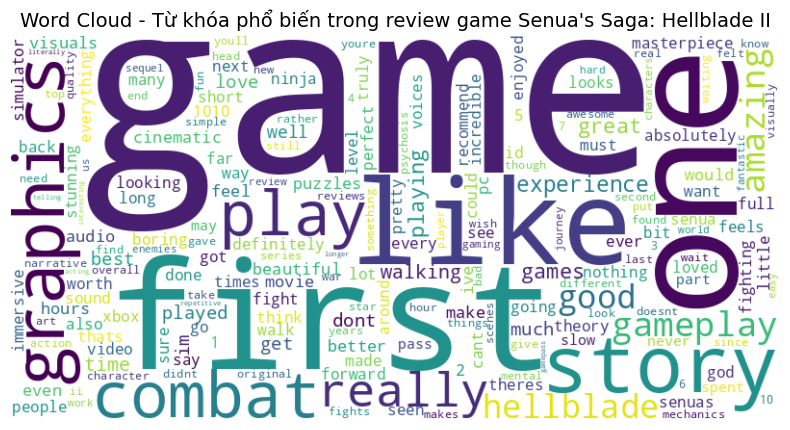

Top 10 từ phổ biến nhất: [('game', 521), ('one', 122), ('first', 122), ('like', 121), ('story', 119), ('graphics', 91), ('combat', 88), ('play', 84), ('really', 69), ('gameplay', 64)]


In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Từ khóa phổ biến trong review game Senua's Saga: Hellblade II", fontsize=14)
plt.show()

# Hiển thị top 10 từ phổ biến nhất
print("Top 10 từ phổ biến nhất:", word_counts.most_common(10))

In [ ]:
data_Senua["Sentiment"] = data_Senua["Review"].astype(str).apply(get_sentiment)

In [ ]:
sentiment_counts = data_Senua["Sentiment"].value_counts()

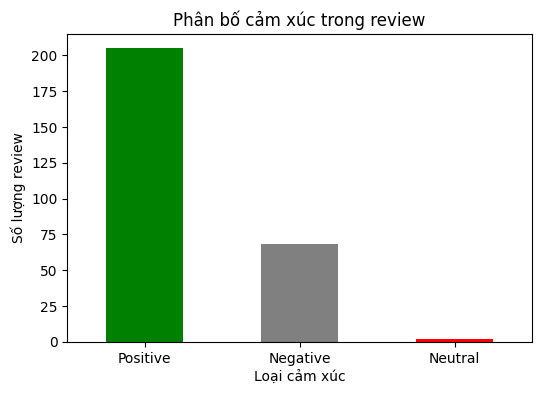

Tỷ lệ cảm xúc trong review:
Sentiment
Positive    0.745455
Negative    0.247273
Neutral     0.007273
Name: count, dtype: float64


In [ ]:
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind="bar", color=["green", "gray", "red"])
plt.title("Phân bố cảm xúc trong review")
plt.xlabel("Loại cảm xúc")
plt.ylabel("Số lượng review")
plt.xticks(rotation=0)
plt.show()

# Hiển thị tỷ lệ phần trăm cảm xúc
print("Tỷ lệ cảm xúc trong review:")
print(sentiment_counts / sentiment_counts.sum())

## Game Black Myth: Wukong

---



In [ ]:
data_blmwk

,FmcO7b,vWB2ve,T7nuU 2,WHxBId,gjvCCd
0,Manny Rojas,6 months ago,A Stunning Action RPG Masterpiece – Black Myth...,You and 104 other people found this helpful.,104 people found this helpful.
1,Trav,2 months ago,"I was originally not going to get the game, in...",You and 19 other people found this helpful.,19 people found this helpful.
2,James Lough,4 months ago,Black Myth Wukong is a completely unforgettabl...,You and 28 other people found this helpful.,28 people found this helpful.
3,Jasmine Sales,3 months ago,"By far the best game i’ve ever played, simply ...",You and 14 other people found this helpful.,14 people found this helpful.
4,Krish Dante,6 months ago,🔥Truly Phenomenal🔥: A Souls-like yet not over ...,You and 124 other people found this helpful.,124 people found this helpful.
...,...,...,...,...,...
445,marcel z,4 months ago,This is literally the worst game ever. Do not ...,You found this helpful.,Was this review helpful to you?
446,Devin Licastro,6 months ago,The combat gets boring pretty quickly. You'll ...,You found this helpful.,Was this review helpful to you?
447,Chris Richardson,7 months ago,Amazing game from graphics to gameplay and sou...,You and 2 other people found this helpful.,2 people found this helpful.
448,Josh Spafard,6 months ago,"Hated it at first, but i warmed up to it. It's...",You and 1 other person found this helpful.,1 person found this helpful.


In [ ]:
data_blmwk.columns = ["Reviewer", "Time", "Review", "Helpful","CountHelpful"]

In [ ]:
data_blmwk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Reviewer      450 non-null    object
 1   Time          450 non-null    object
 2   Review        450 non-null    object
 3   Helpful       450 non-null    object
 4   CountHelpful  450 non-null    object
dtypes: object(5)
memory usage: 17.7+ KB


In [ ]:
data_blmwk.describe()

,Reviewer,Time,Review,Helpful,CountHelpful
count,450,450,450,450,450
unique,450,16,450,44,44
top,Ryan Dennington,6 months ago,If you want to enjoy and game through DONT BUY...,You found this helpful.,Was this review helpful to you?
freq,1,191,1,220,220


In [ ]:
data_blmwk["Cleaned_Review_ Black Myth: Wukong"] = data_blmwk["Review"].astype(str).apply(preprocess_text)
data_blmwk["Cleaned_Review_ Black Myth: Wukong"]

,Cleaned_Review_ Black Myth: Wukong
0,stunning action rpg masterpiece black myth wuk...
1,originally going get game fact even heard shor...
2,black myth wukong completely unforgettable act...
3,far best game ive ever played simply phenomena...
4,truly phenomenal soulslike yet punishing souls...
...,...
445,literally worst game ever buy regret unless wa...
446,combat gets boring pretty quickly youll fighti...
447,amazing game graphics gameplay sound design wo...
448,hated first warmed enraging time rewarding bea...


In [ ]:
all_text = " ".join(data_blmwk["Cleaned_Review_ Black Myth: Wukong"])
word_counts = Counter(all_text.split())

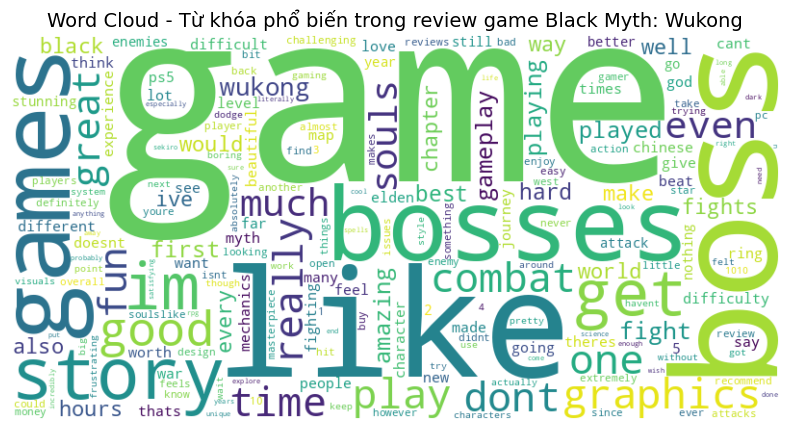

Top 10 từ phổ biến nhất: [('game', 1362), ('like', 309), ('boss', 294), ('bosses', 212), ('games', 204), ('story', 189), ('im', 154), ('get', 148), ('good', 144), ('graphics', 143)]


In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Từ khóa phổ biến trong review game Black Myth: Wukong", fontsize=14)
plt.show()

# Hiển thị top 10 từ phổ biến nhất
print("Top 10 từ phổ biến nhất:", word_counts.most_common(10))

In [ ]:
data_blmwk["Sentiment"] = data_blmwk["Review"].astype(str).apply(get_sentiment)

In [ ]:
sentiment_counts = data_blmwk["Sentiment"].value_counts()

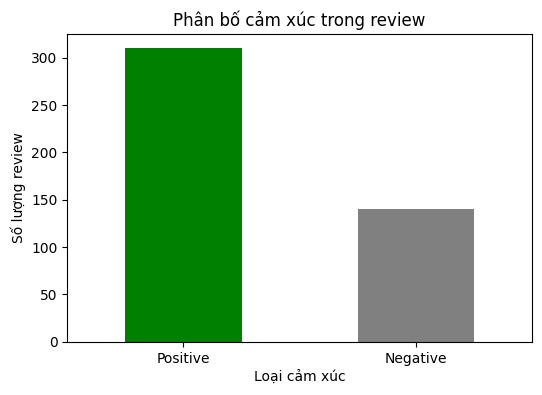

Tỷ lệ cảm xúc trong review:
Sentiment
Positive    0.688889
Negative    0.311111
Name: count, dtype: float64


In [ ]:
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind="bar", color=["green", "gray", "red"])
plt.title("Phân bố cảm xúc trong review")
plt.xlabel("Loại cảm xúc")
plt.ylabel("Số lượng review")
plt.xticks(rotation=0)
plt.show()

# Hiển thị tỷ lệ phần trăm cảm xúc
print("Tỷ lệ cảm xúc trong review:")
print(sentiment_counts / sentiment_counts.sum())